<h1>Credit Card Fraud Detection</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
data=pd.read_csv('Sample.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85442 entries, 0 to 85441
Data columns (total 32 columns):
Unnamed: 0    85442 non-null int64
Time          85442 non-null float64
V1            85442 non-null float64
V2            85442 non-null float64
V3            85442 non-null float64
V4            85442 non-null float64
V5            85442 non-null float64
V6            85442 non-null float64
V7            85442 non-null float64
V8            85442 non-null float64
V9            85442 non-null float64
V10           85442 non-null float64
V11           85442 non-null float64
V12           85442 non-null float64
V13           85442 non-null float64
V14           85442 non-null float64
V15           85442 non-null float64
V16           85442 non-null float64
V17           85442 non-null float64
V18           85442 non-null float64
V19           85442 non-null float64
V20           85442 non-null float64
V21           85442 non-null float64
V22           85442 non-null float64
V23  

In [50]:
data.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,182545,125447.0,1.816429,0.146354,0.046576,3.598831,-0.119489,0.764143,-0.673691,0.375930,...,0.235474,0.539597,0.240714,0.691290,-0.349606,-0.055401,-0.011830,-0.033766,18.92,0
1,264950,161666.0,-1.132632,-0.217753,-1.018984,-0.725154,1.624606,-1.123202,0.151016,0.322056,...,0.439623,0.855120,-0.058180,0.115257,-0.786822,0.591033,0.308595,0.055496,24.95,0
2,278614,168323.0,1.754189,0.230348,0.019154,3.927093,-0.087202,0.227146,-0.115704,0.053371,...,-0.374842,-1.136878,0.441901,-0.183241,-0.580846,-0.508929,-0.005608,-0.019285,64.40,0
3,10160,15578.0,1.028419,0.252588,1.744422,2.801771,-0.613426,0.860407,-0.849896,0.375564,...,-0.148324,-0.044123,0.103698,0.142224,0.132222,-0.080803,0.026917,0.016913,0.00,0
4,64,42.0,-0.522666,1.009923,0.276470,1.475289,-0.707013,0.355243,1.559849,-0.399579,...,0.172401,1.011543,0.069666,0.157820,-1.109224,-0.302369,0.318170,0.316910,243.66,0


<p></p>

Checking the the target class


Text(0,0.5,'value')

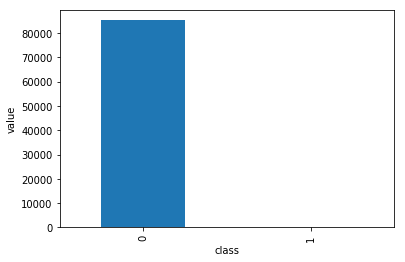

In [8]:
count=data['Class'].value_counts()
count.plot(kind='bar')
plt.xlabel('class')
plt.ylabel('value')

In [9]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
data['norm_amount']=ss.fit_transform(data['Amount'].values.reshape(-1,1))
data=data.drop(['Amount','Time'],axis=1)
data.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,norm_amount
0,182545,1.816429,0.146354,0.046576,3.598831,-0.119489,0.764143,-0.673691,0.375930,-0.534457,...,0.235474,0.539597,0.240714,0.691290,-0.349606,-0.055401,-0.011830,-0.033766,0,-0.294421
1,264950,-1.132632,-0.217753,-1.018984,-0.725154,1.624606,-1.123202,0.151016,0.322056,-0.238261,...,0.439623,0.855120,-0.058180,0.115257,-0.786822,0.591033,0.308595,0.055496,0,-0.269052
2,278614,1.754189,0.230348,0.019154,3.927093,-0.087202,0.227146,-0.115704,0.053371,-0.475027,...,-0.374842,-1.136878,0.441901,-0.183241,-0.580846,-0.508929,-0.005608,-0.019285,0,-0.103078
3,10160,1.028419,0.252588,1.744422,2.801771,-0.613426,0.860407,-0.849896,0.375564,1.171960,...,-0.148324,-0.044123,0.103698,0.142224,0.132222,-0.080803,0.026917,0.016913,0,-0.374021
4,64,-0.522666,1.009923,0.276470,1.475289,-0.707013,0.355243,1.559849,-0.399579,-0.479813,...,0.172401,1.011543,0.069666,0.157820,-1.109224,-0.302369,0.318170,0.316910,0,0.651104


In [10]:
data=data.iloc[:,1:]

In [11]:
x=data.drop('Class',axis=1).values
y=data.loc[:,'Class'].values

UNDER-sampling

In [12]:
number_frauds=len(data[data.Class==1])
fraud_indices=np.array(data[data.Class==1].index)

normal_indices=data[data.Class==0].index

rand_normal_indices=np.random.choice(normal_indices,number_frauds,replace=False)

under_sample_indices=np.concatenate([fraud_indices,rand_normal_indices])

under_sample_data=data.iloc[under_sample_indices,:]

X_undersample = under_sample_data.loc[:, under_sample_data.columns != 'Class'].values
y_undersample = under_sample_data.loc[:, under_sample_data.columns == 'Class'].values.ravel()



In [13]:
print("Percentage of normal transactions:", len(under_sample_data[under_sample_data.Class==0])/
     len(under_sample_data))
print("Percentage of fraud transactions:", len(under_sample_data[under_sample_data.Class==1])/
     len(under_sample_data))
print("Total number of transactions in resampled data: ", len(under_sample_data))

Percentage of normal transactions: 0.5
Percentage of fraud transactions: 0.5
Total number of transactions in resampled data:  320


Splitting data into train and test set

In [14]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.30, random_state=0)

print("Number transactions train dataset: ", len(x_train))
print("Number transactions test dataset: ", len(x_test))
print("Total number of transactions: ", len(x_train)+len(x_test))

x_train_undersample,x_test_undersample,y_train_undersample,y_test_undersample=train_test_split(
X_undersample, y_undersample, test_size=0.30, random_state=0)

print("")
print("Number transactions train dataset: ", len(x_train_undersample))
print("Number transactions test dataset: ", len(x_test_undersample))
print("Total number of transactions: ", len(x_train_undersample)+len(x_test_undersample))

Number transactions train dataset:  59809
Number transactions test dataset:  25633
Total number of transactions:  85442

Number transactions train dataset:  224
Number transactions test dataset:  96
Total number of transactions:  320


<h2>Logistic regression classifier - Undersampled data</h2>

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import (make_scorer, accuracy_score, confusion_matrix, precision_recall_curve,
                             auc,roc_curve, roc_auc_score ,recall_score, classification_report)

In [16]:
fold=KFold(n_splits=5,random_state=0)
lr=LogisticRegression(random_state=0)
score=make_scorer(recall_score)
c=[0.01, 0.1,1,10,10]
param={'C':c}
grd=GridSearchCV(lr,param,scoring=score,cv=fold)
grd.fit(x_train_undersample,y_train_undersample)
print(grd.best_score_, grd.best_params_, grd.scorer_)

0.9162890061327561 {'C': 0.01} make_scorer(recall_score)


In [17]:
#the best undersample model

lr=LogisticRegression(C=0.01,random_state=0)
lr.fit(x_train_undersample,y_train_undersample)
y_pred_undersample=lr.predict(x_test_undersample)
y_pred=lr.predict(x_test)

In [18]:
import seaborn as sns
def metric(y_t,y_p):
    cm=confusion_matrix(y_t,y_p)
    ac=accuracy_score(y_t,y_p)
    print('accuracy',ac)
    rs=recall_score(y_t,y_p)
    print("recall_score",rs)
    df_cm=pd.DataFrame(cm,index=[i for i in['normal','fraud']],
                       columns=[k for k in ['normal','fraud']])
    sns.heatmap(df_cm,annot=True,cmap='Blues',fmt='g')
    plt.title('Confusion matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy 0.9270833333333334
recall_score 0.9622641509433962


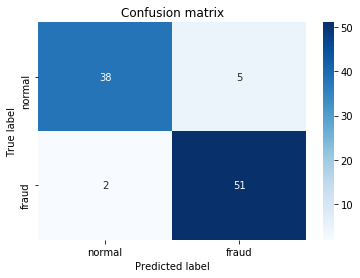

In [19]:
metric(y_test_undersample,y_pred_undersample)

accuracy 0.898529239652011
recall_score 0.9310344827586207


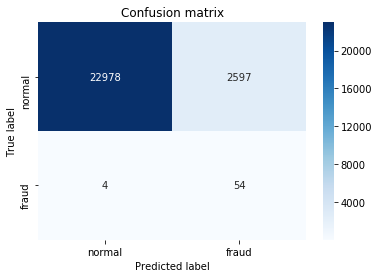

In [20]:
metric(y_test,y_pred)

Still a very decent recall accuracy when applying it to a much larger and skewed dataset!